# Animated k-Means Examples
This simple notebook show how to generate a sequence of frames to produce an animation of k-Means.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph

from matplotlib.colors import ListedColormap

import math

warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(844)

## Utility Functions
We define the utility functions we need to 
- define the plotting parameters so that if we want to change our the figures are saved we change all the parameters in one place
- plot the current status of k-means
- run k-means step by step for a given number of iterations

In [2]:
def GetParameters(dataset):
    parameters = {'figsize':(10,10), 'xlabel':'x', 'ylabel':'y'}
    parameters['xmax']=np.round(np.max(dataset[:,0]),0)+0.5
    parameters['xmin']=np.round(np.min(dataset[:,0]),0)-0.5
    parameters['ymax']=np.round(np.max(dataset[:,1]),0)+0.5
    parameters['ymin']=np.round(np.min(dataset[:,1]),0)-0.5
    parameters['alpha']=1.0
    parameters['point-color']='grey'
    parameters['cluster-color']=['#a6cdf6','#b2d0b7','#f98ea1']
    parameters['centroid-color']=['#1b80e8','#599062','#e20c32']
    return parameters

In [3]:
def PlotClusters(parameters, X, centroids=[], clusters_id=[], label=''):
    plt.figure(figsize=parameters['figsize'])

    plt.rc('font', **{'family' : 'sans', 'size'   : 16})
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)

    if (clusters_id==[]):
        plt.scatter(X[:, 0], X[:, 1], s=50, alpha=parameters['alpha'], c=parameters['point-color'])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50, alpha=parameters['alpha'], c=[parameters['cluster-color'][x] for x in clusters_id])

    if (centroids!=[]):
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, color=parameters['centroid-color'][:len(centroids)])
    
    plt.xlim([parameters['xmin'],parameters['xmax']])
    plt.ylim([parameters['ymin'],parameters['ymax']])
    plt.xlabel(parameters['xlabel'])
    plt.ylabel(parameters['ylabel'])
    
    if 'title' in parameters:
        plt.title(parameters['title'])
        
    if (label!=''):
        plt.savefig(label)
    plt.show();

In [4]:
def StepByStepKMeans(dataset,centroids,iterations,filename):
    
    parameters = GetParameters(dataset)
    
    k = len(centroids)
    
    PlotClusters(parameters,dataset,centroids,label=filename+'-start.png');

    for i in range(iterations):
        
        model = KMeans(n_clusters=k, init=centroids, max_iter=1)
        
        model.fit(dataset)
        
        clusters_id = model.predict(dataset)

        parameters['title'] = 'Iteration '+str(i)+" - Assign Cluster"
        parameters['title'] = ''
        PlotClusters(parameters,dataset,centroids,clusters_id,label=filename+'-'+str(i)+'-assign.png')        

        centroids = model.cluster_centers_
        
        parameters['title'] = 'Iteration '+str(i)+" - Update Centroid Cluster"
        parameters['title'] = ''
        PlotClusters(parameters,dataset,centroids,clusters_id,label=filename+'-'+str(i)+'-update.png')
        
        if (model.n_iter_==0):
            return



## Example Dataset
First, we define a simple dataset with three clusters.

In [5]:
cluster1 = np.random.normal(5, 1, (1000,2))
cluster2 = np.random.normal(15, 1, (1000,2))
cluster3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
cluster4 = np.random.multivariate_normal([2,16], [[.5,0],[0,.5]], 1000)
# da un errore
dataset1 = np.concatenate((cluster1, cluster2))




Define the plot parameters and plot the data

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


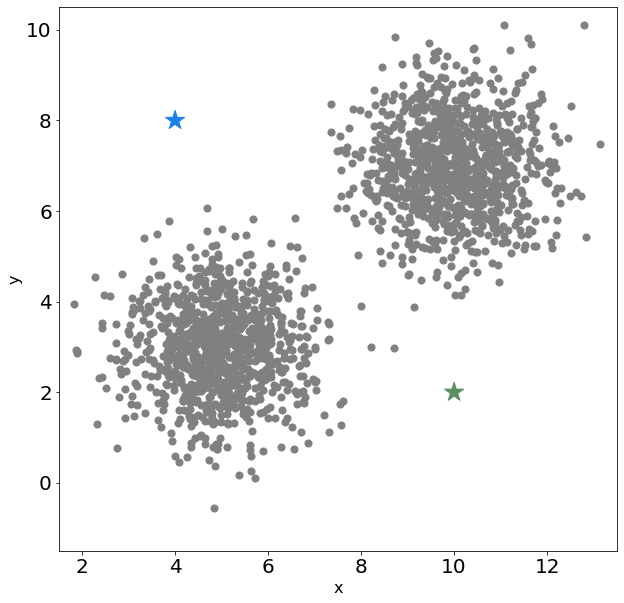

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


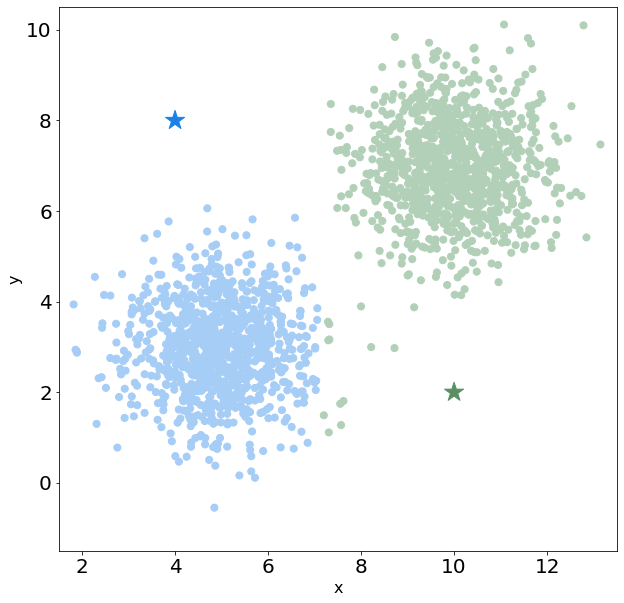

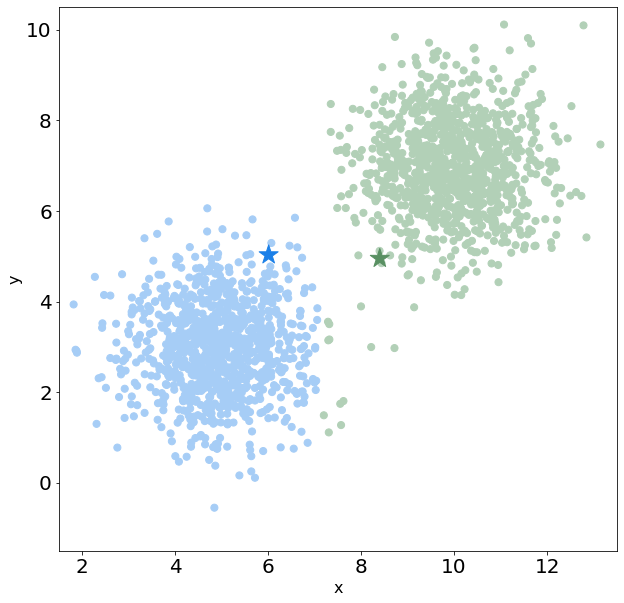

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


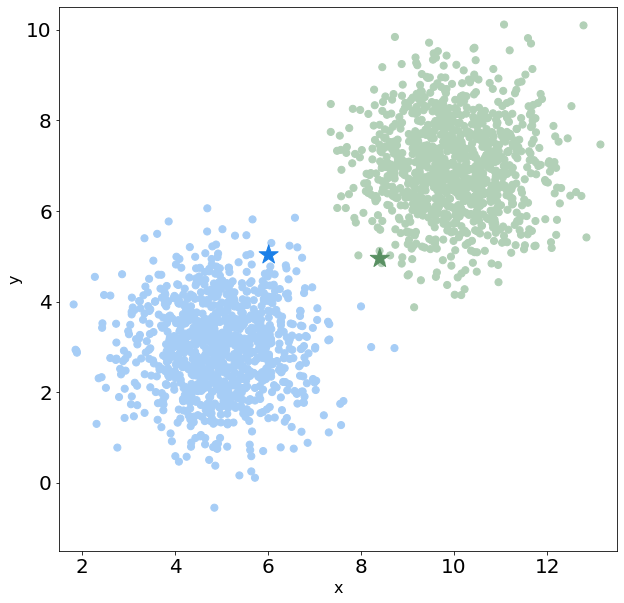

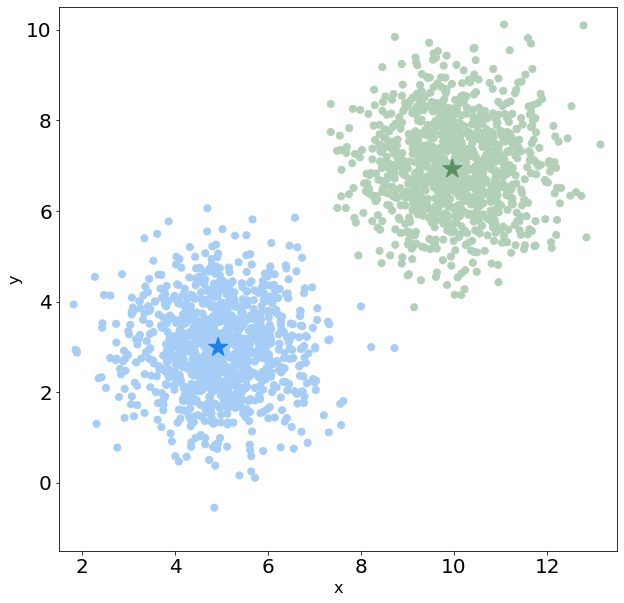

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


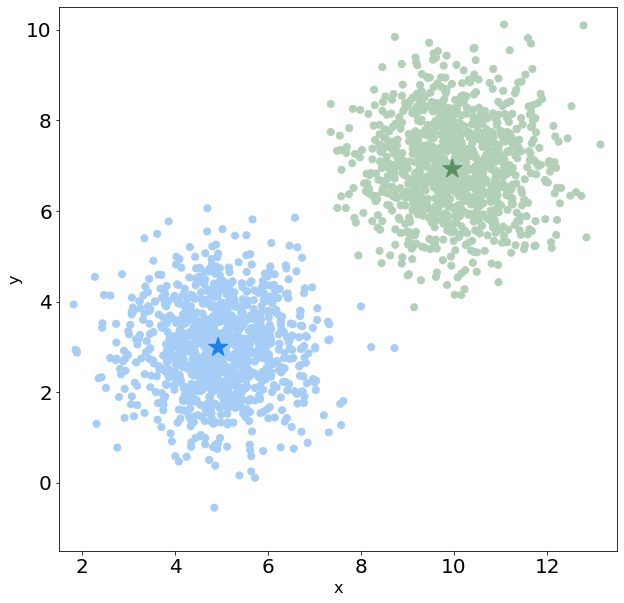

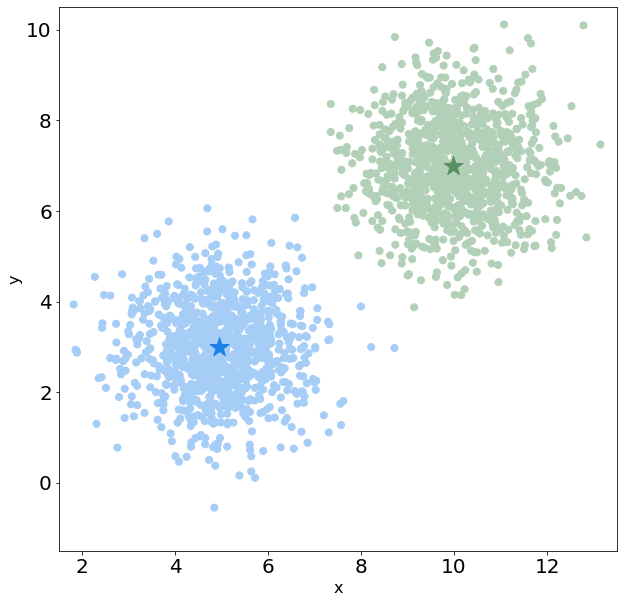

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


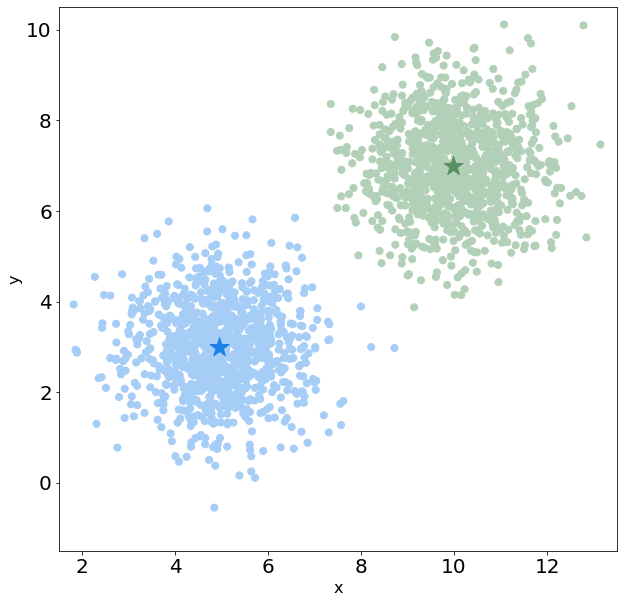

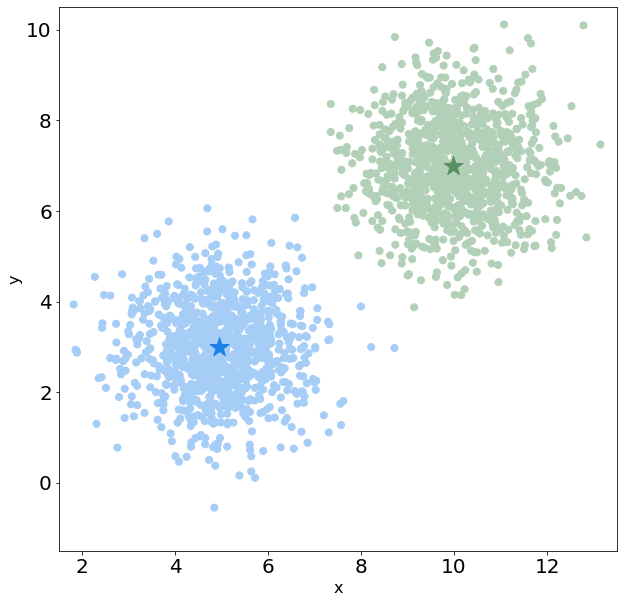

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


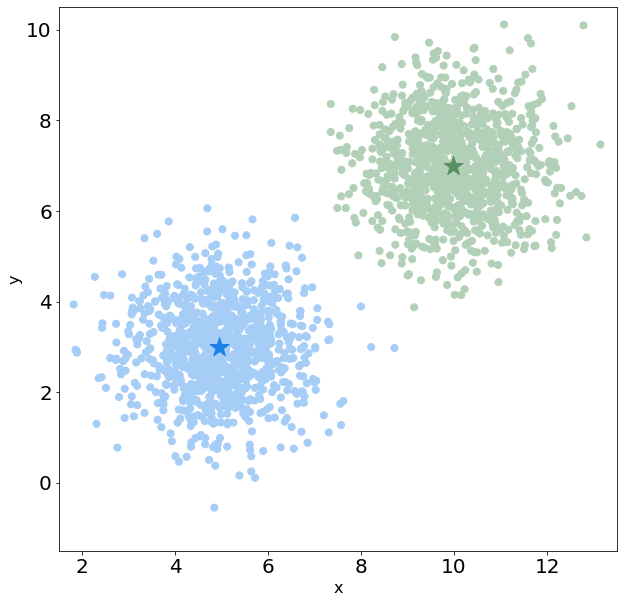

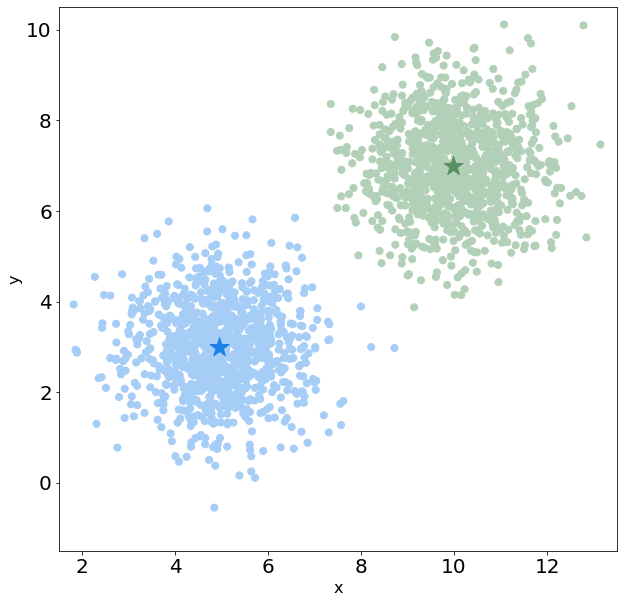

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


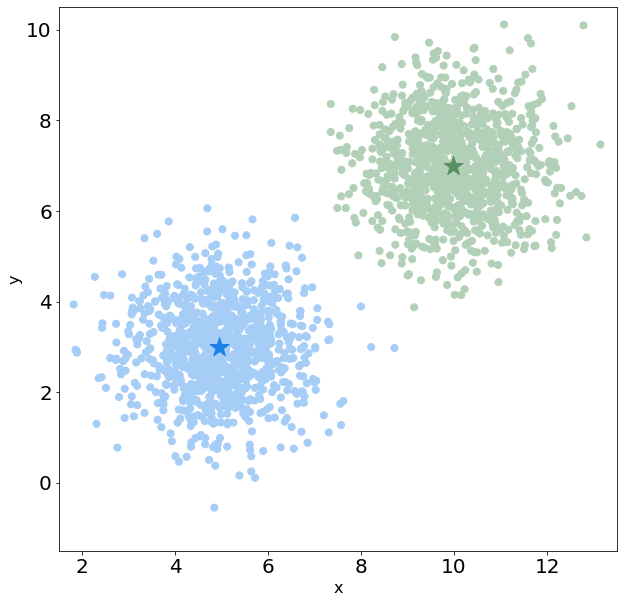

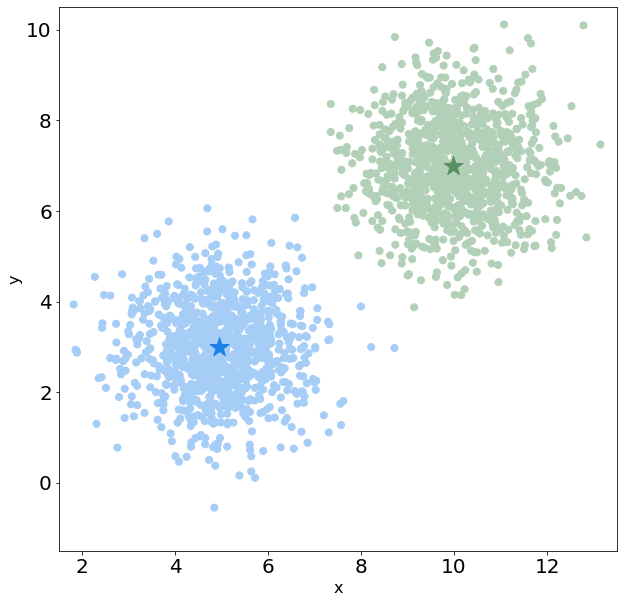

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


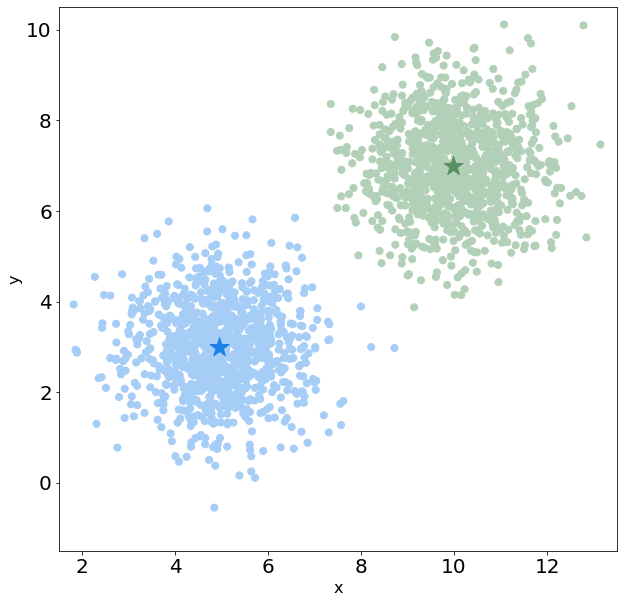

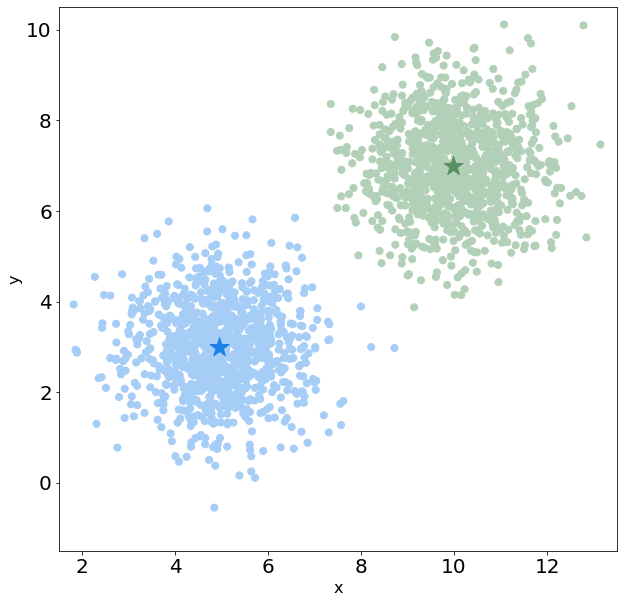

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


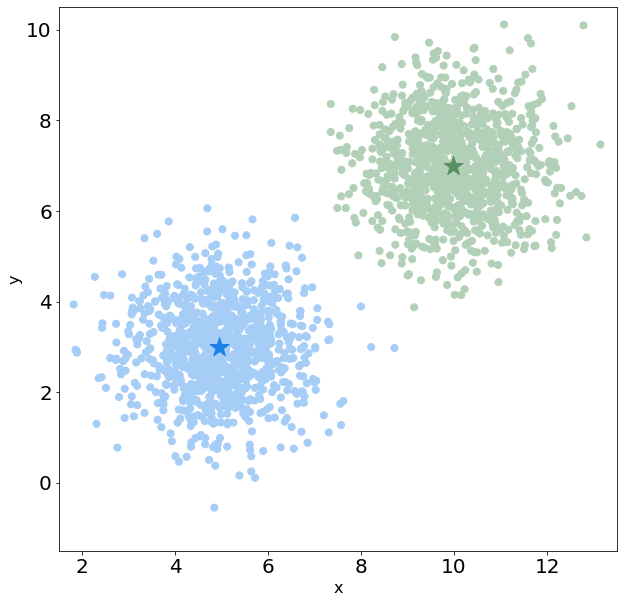

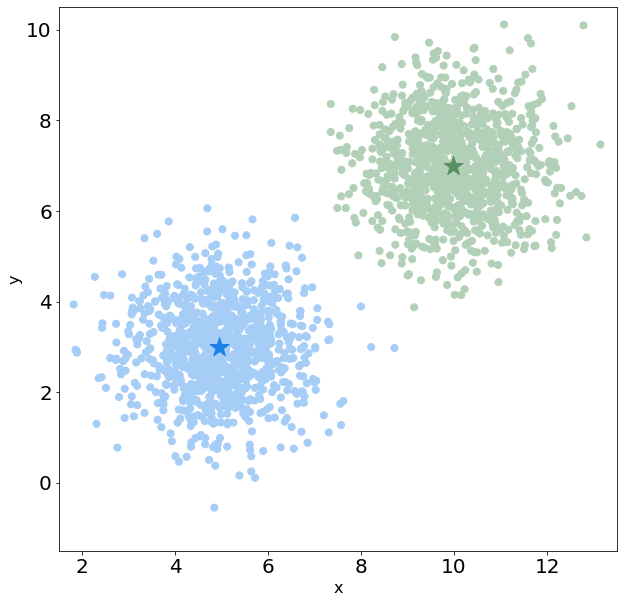

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


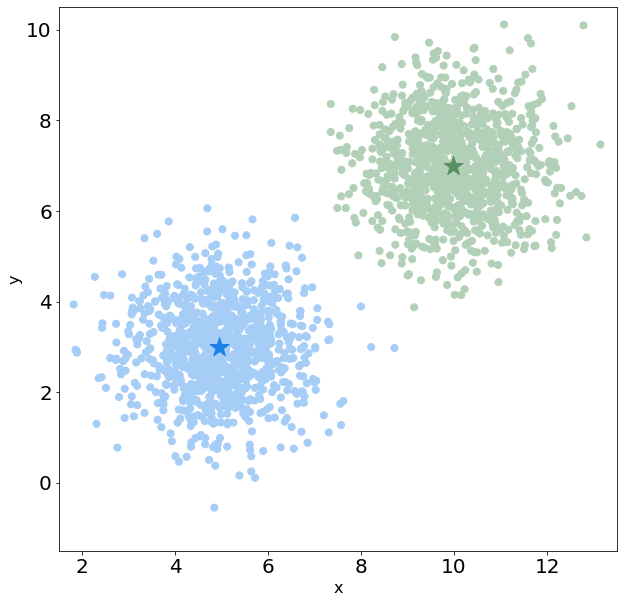

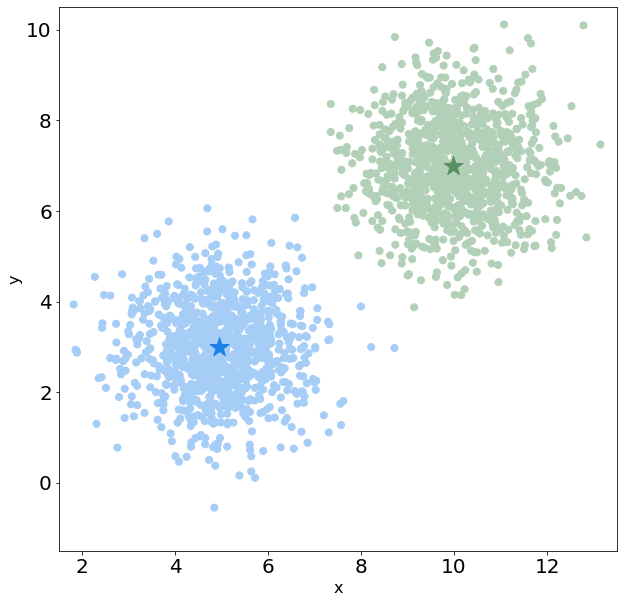

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


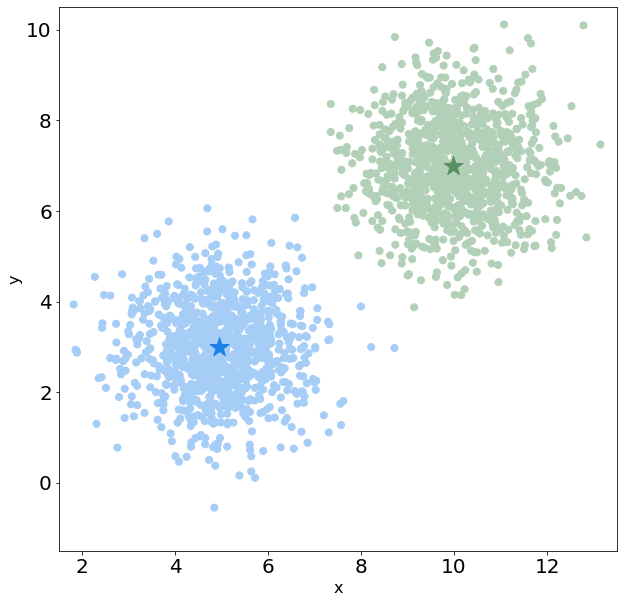

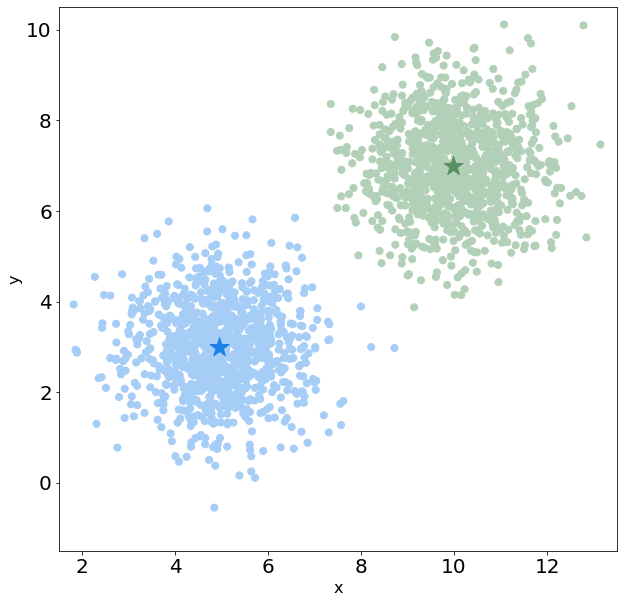

In [6]:
cluster3A = np.random.normal([5,3], 1, (1000,2))
cluster3B = np.random.normal([10,7], 1, (1000,2))
dataset3 = np.concatenate((cluster3A, cluster3B))

parameters = GetParameters(dataset1)
centroids = np.array([[4,8], [10,2]], np.float64)
StepByStepKMeans(dataset3,centroids,10,'example3');

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


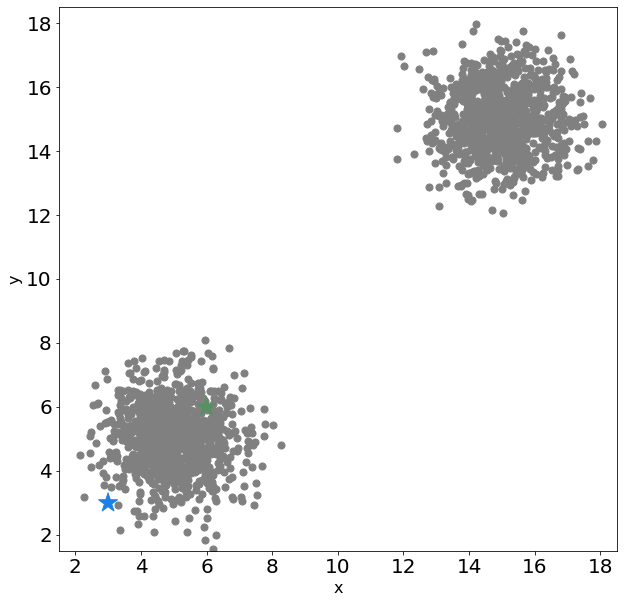

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


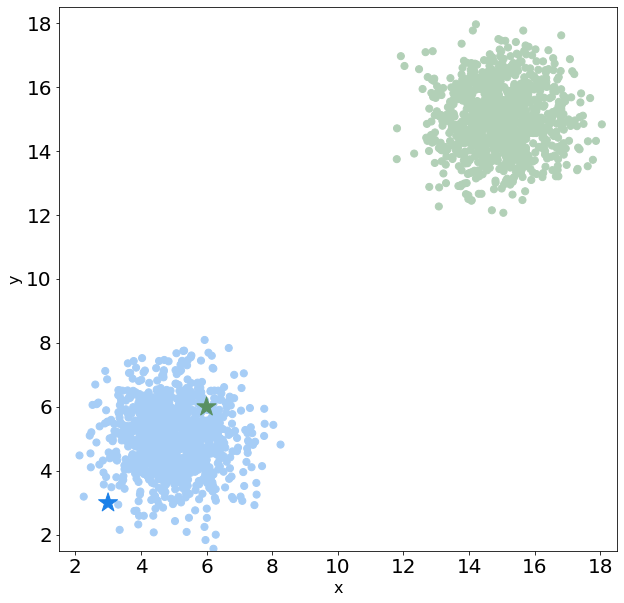

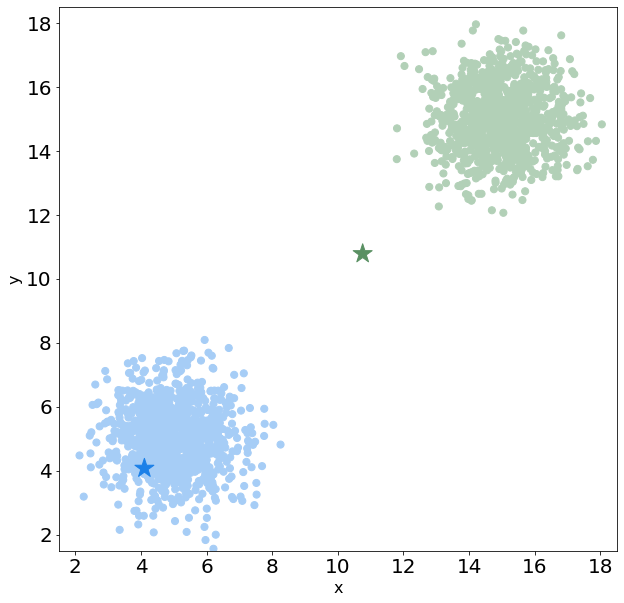

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


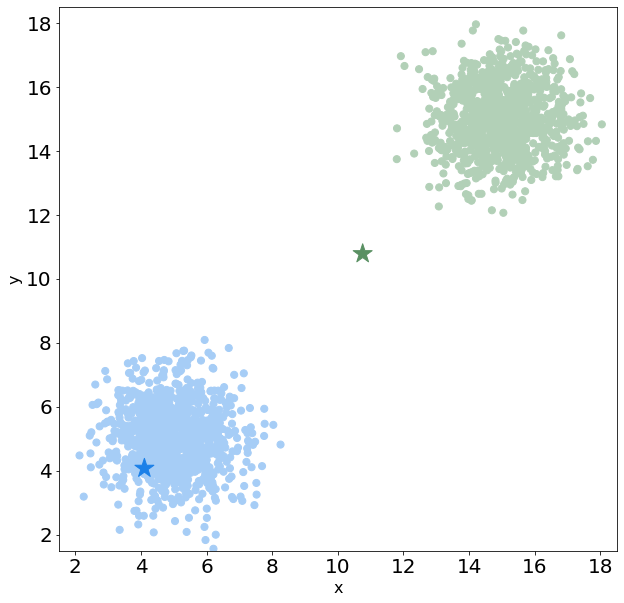

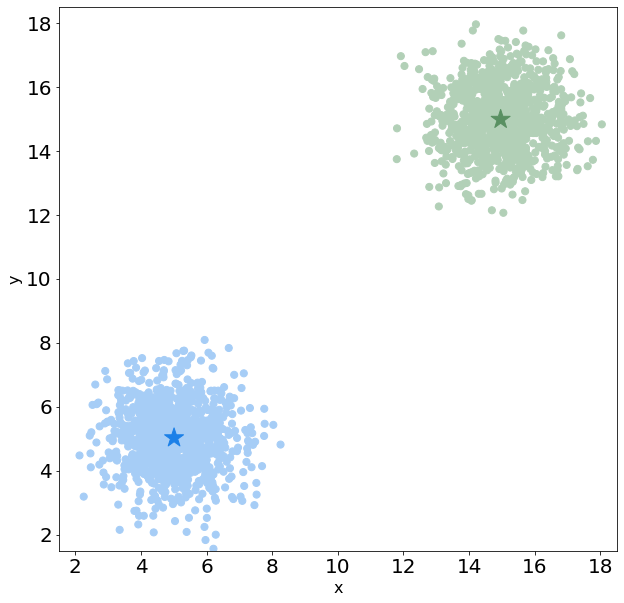

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


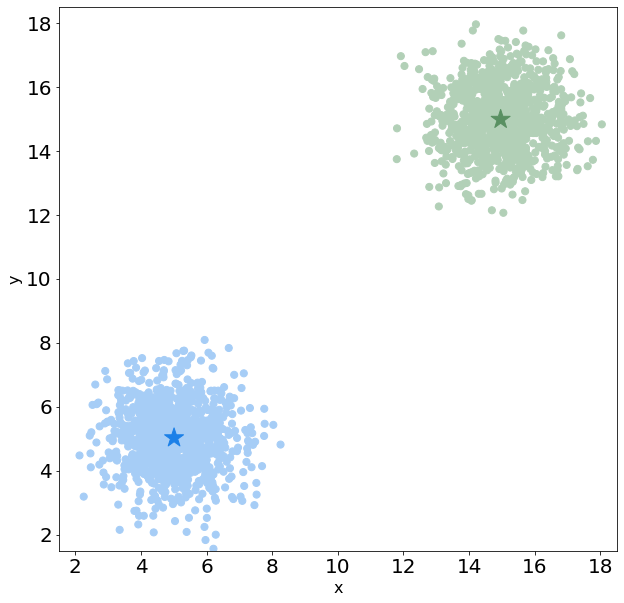

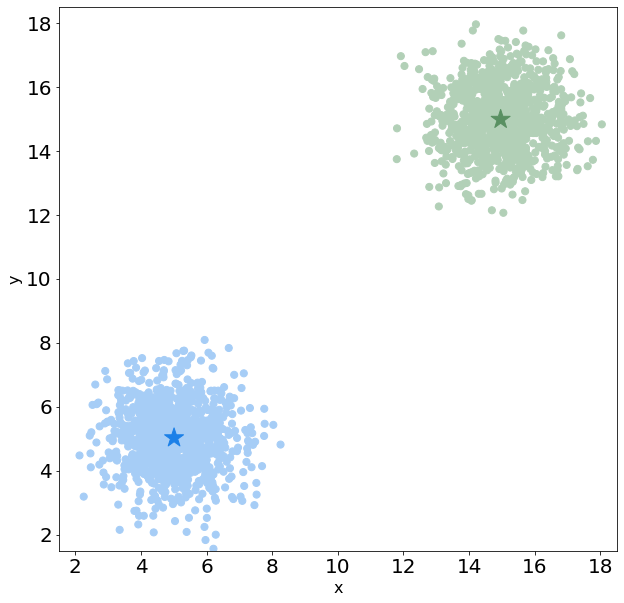

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


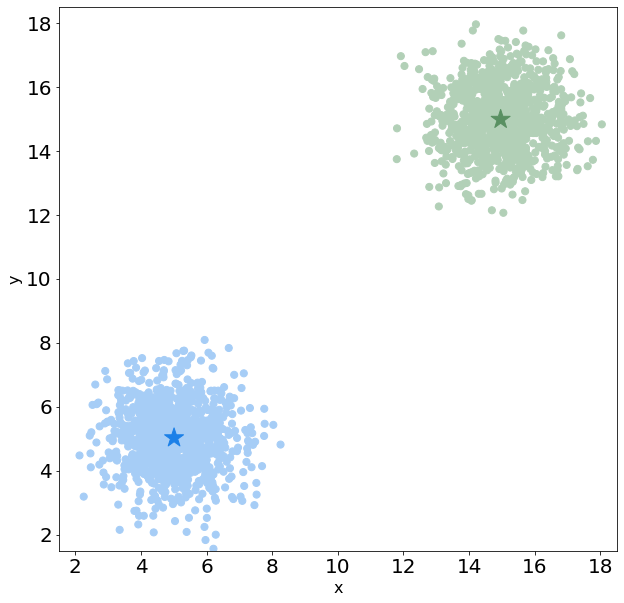

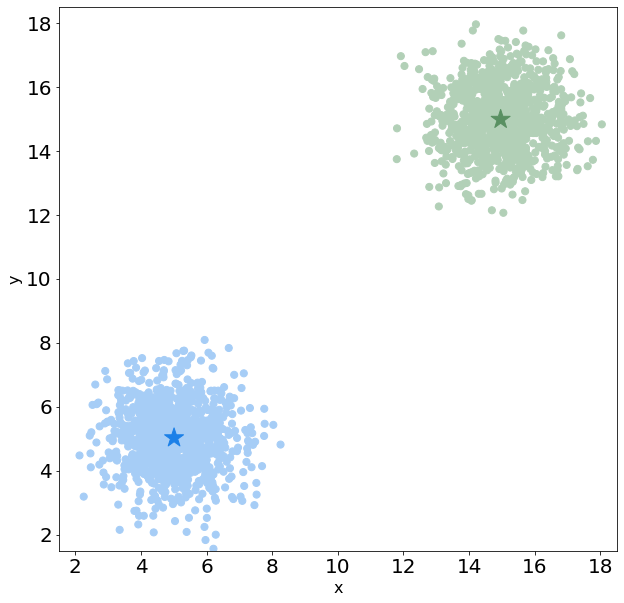

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


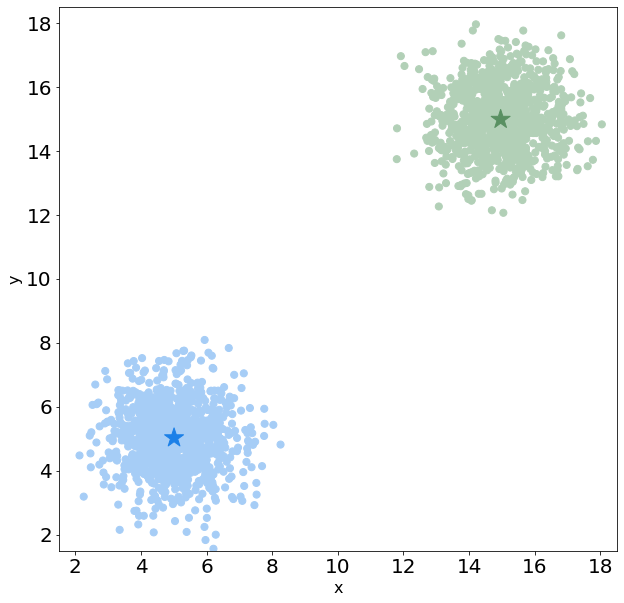

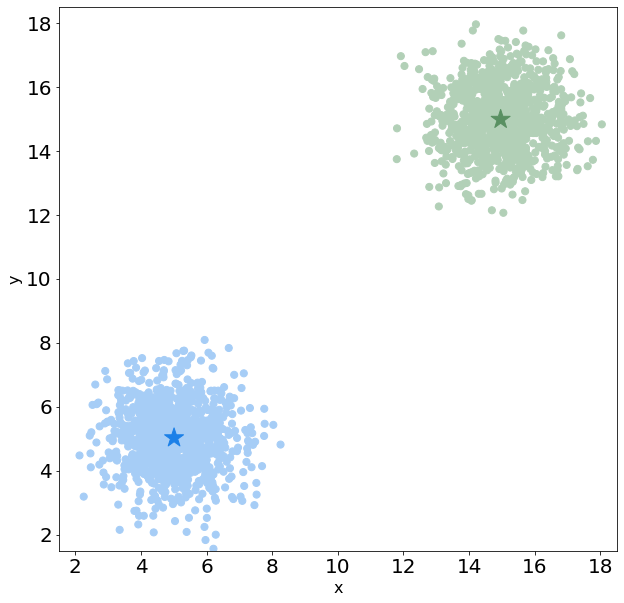

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


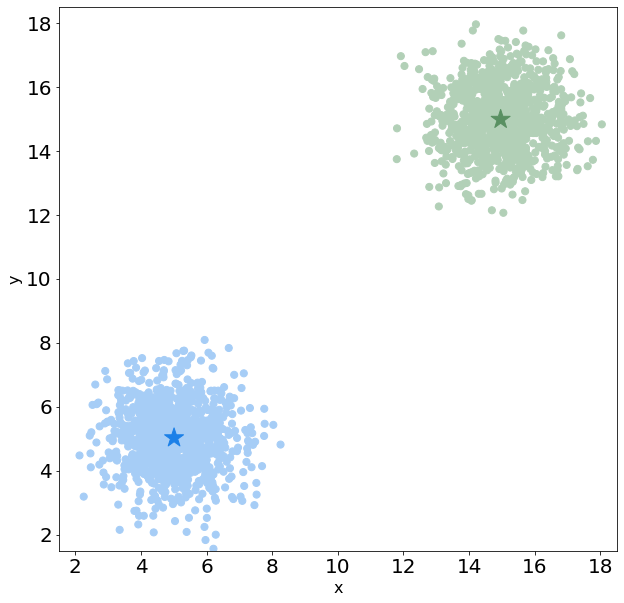

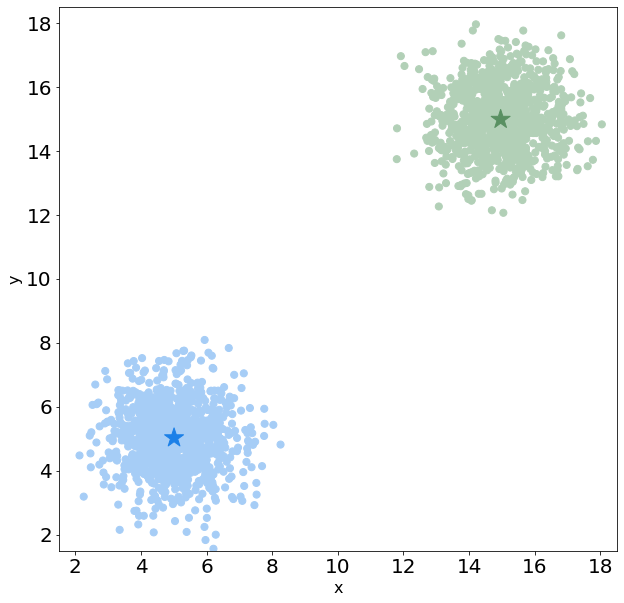

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


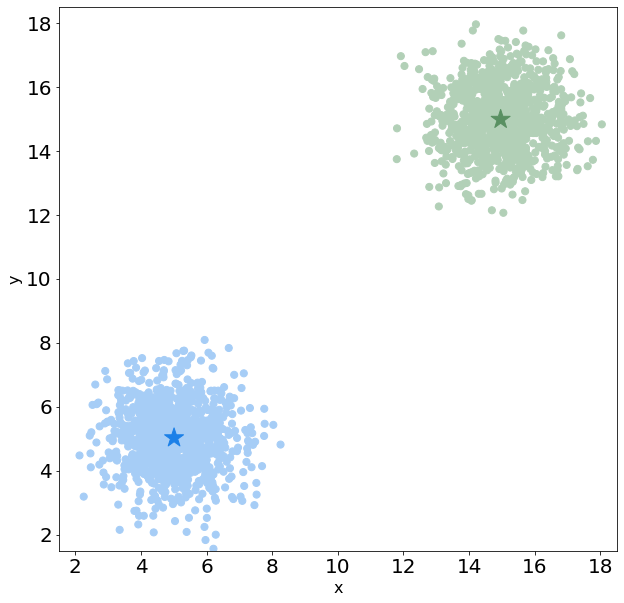

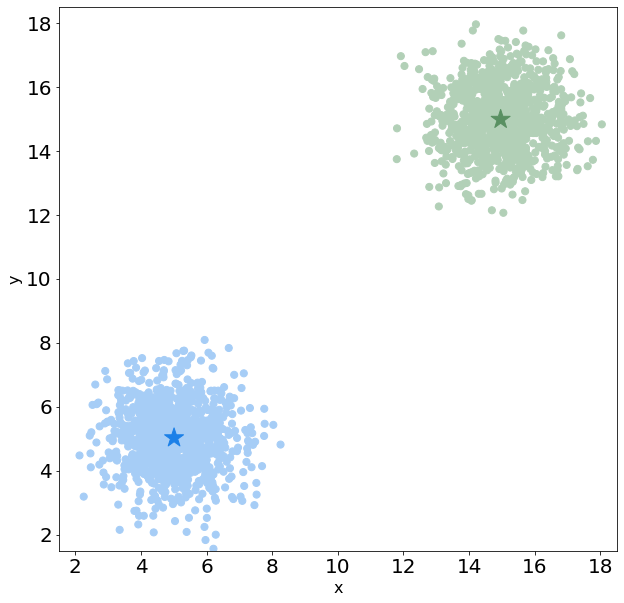

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


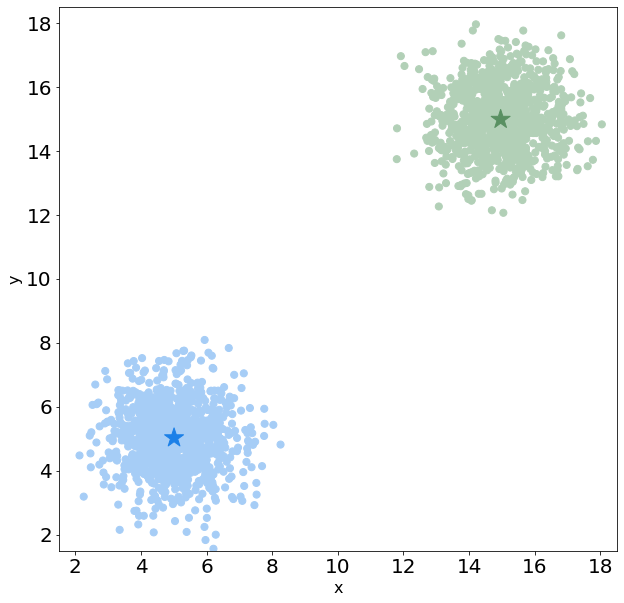

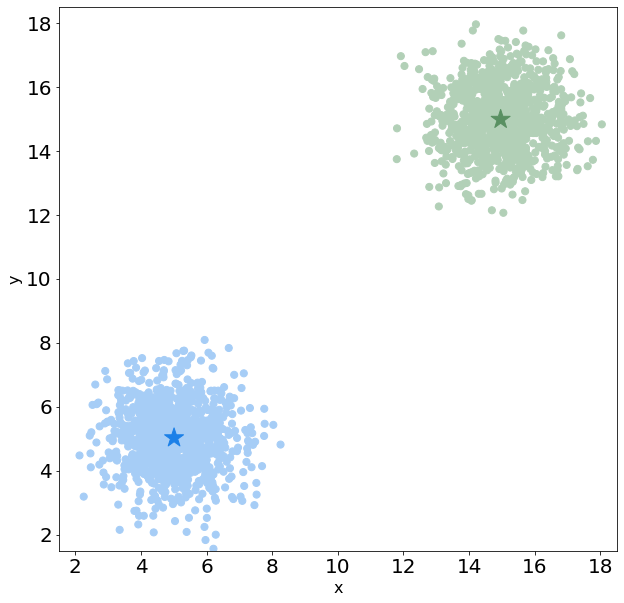

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


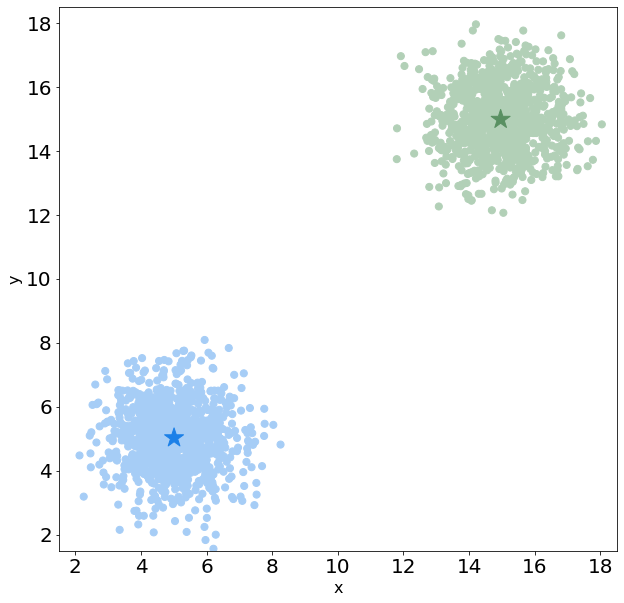

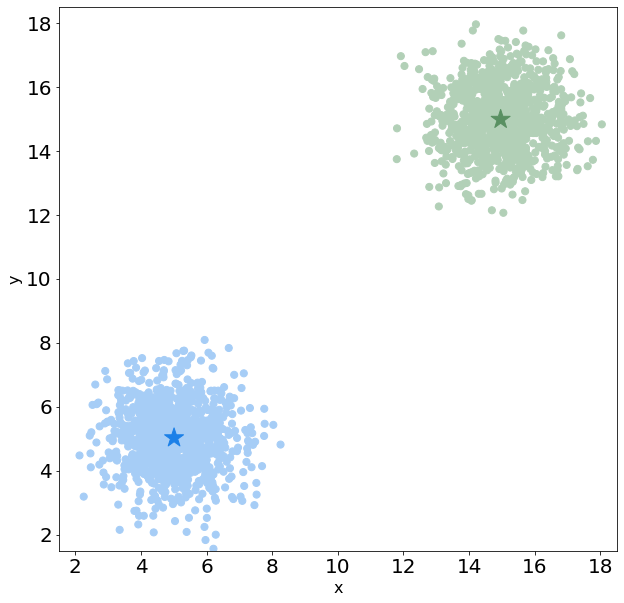

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


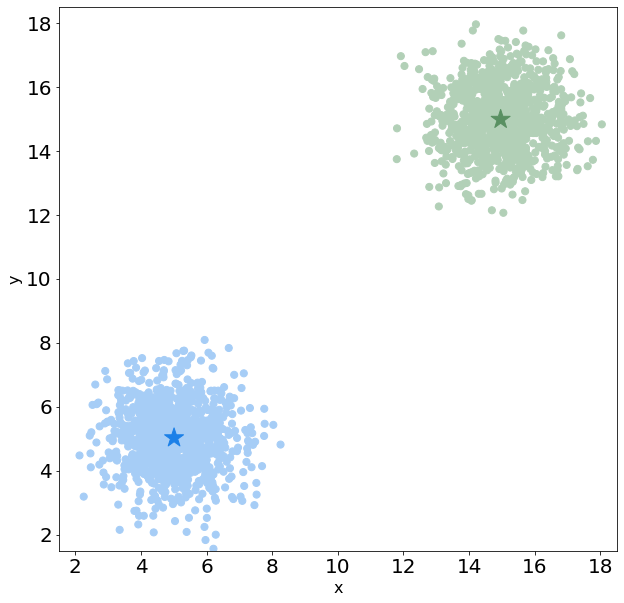

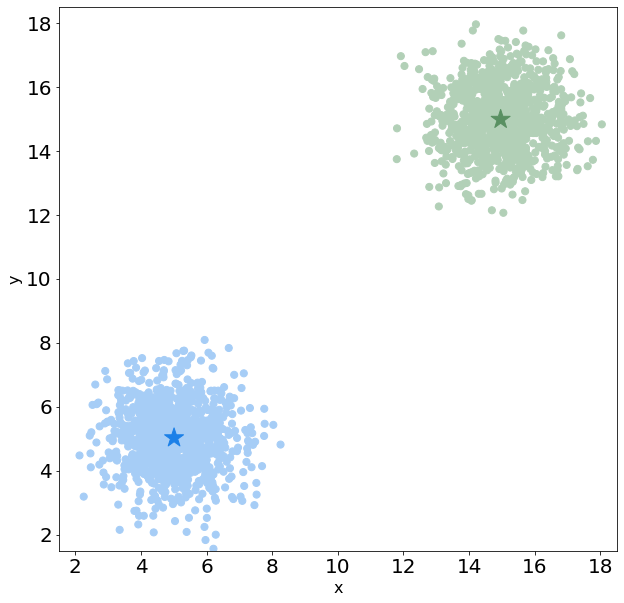

In [7]:
centroids = np.array([[3,3], [6,6]], np.float64)
StepByStepKMeans(dataset1,centroids,10,"example2")

In [8]:
cluster4A = np.random.normal([8,8], .75, (500,2))
cluster4B = np.random.normal([3,3], .5, (250,2))
cluster4C = np.random.normal([13,3], .5, (250,2))

dataset4 = np.concatenate((cluster4A, cluster4B, cluster4C))

parameters = GetParameters(dataset4)


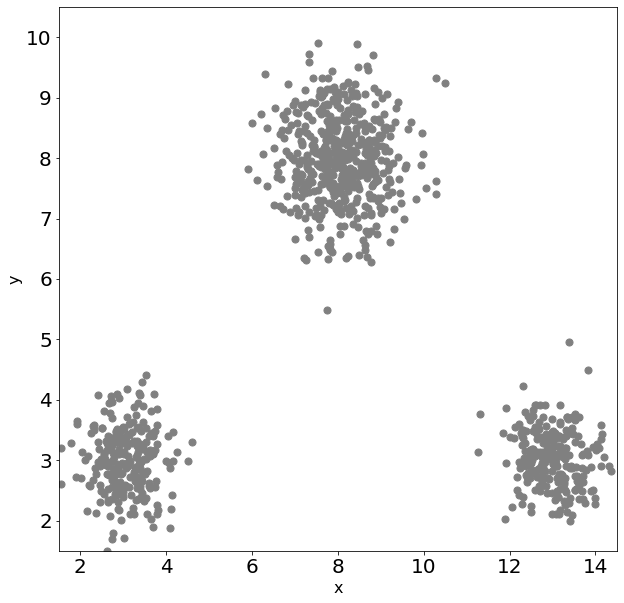

In [9]:
PlotClusters(parameters, dataset4, centroids=[], clusters_id=[], label='example4-data.png');

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


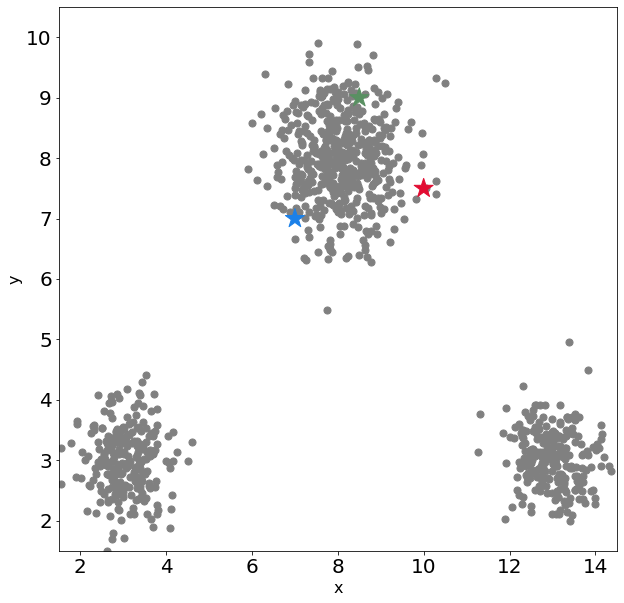

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


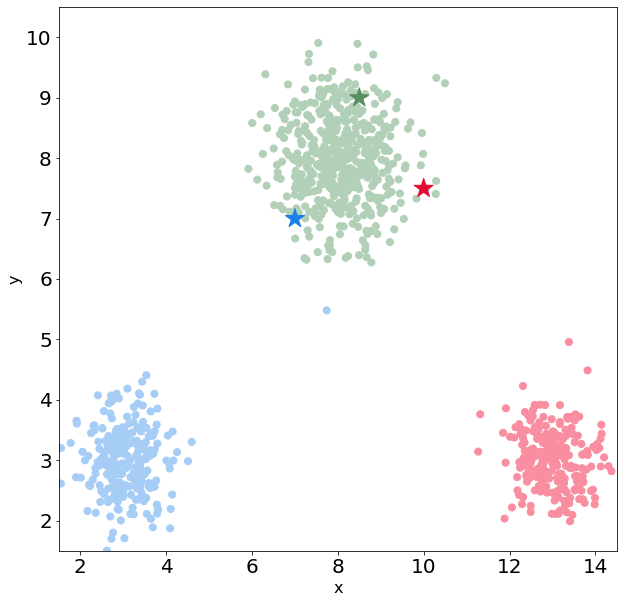

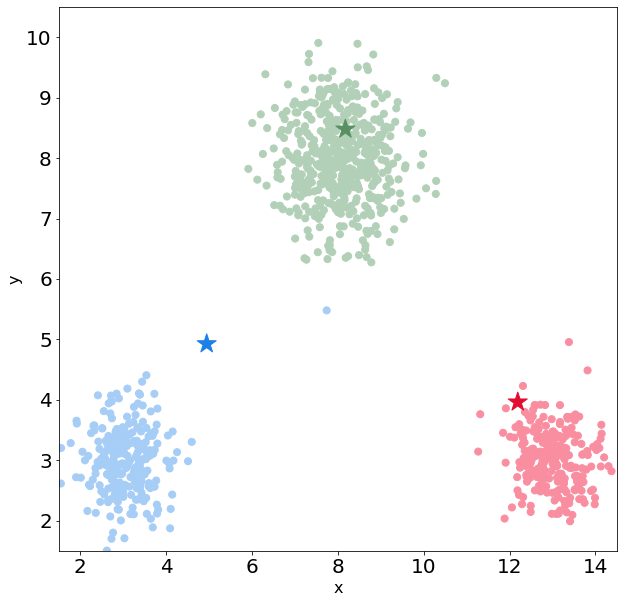

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


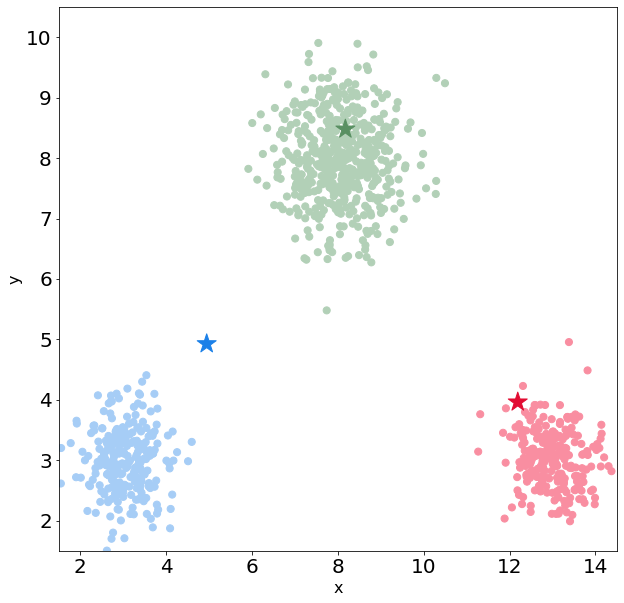

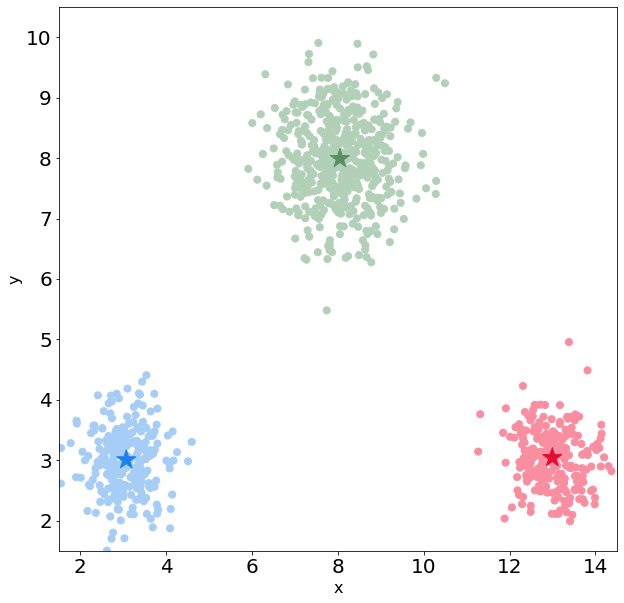

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


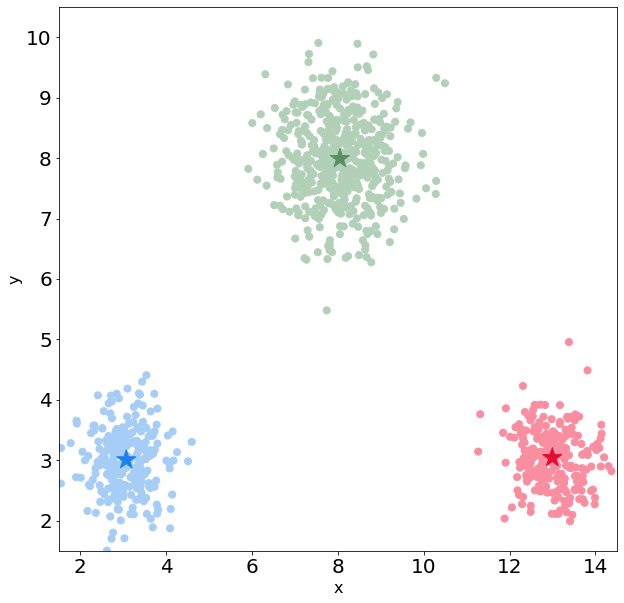

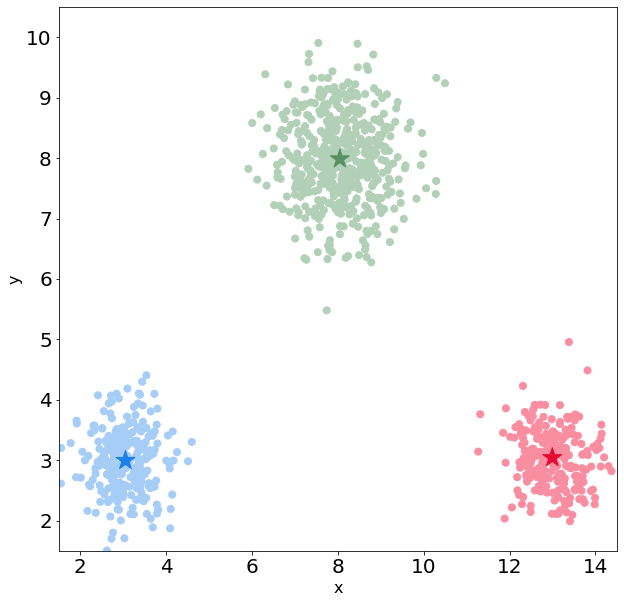

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


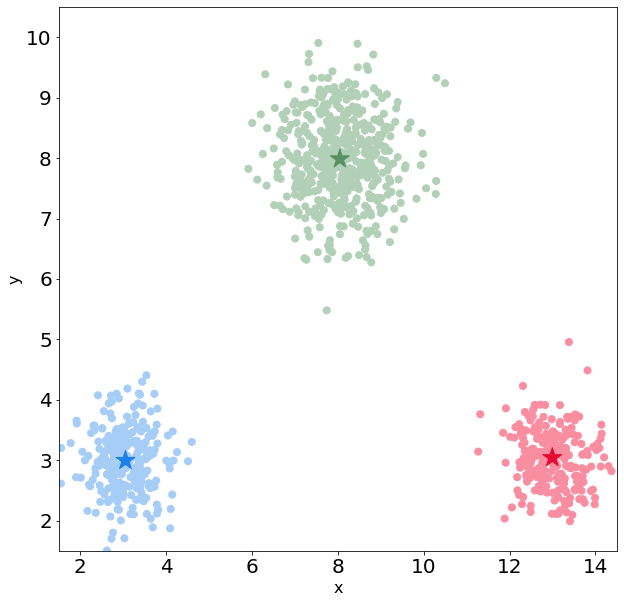

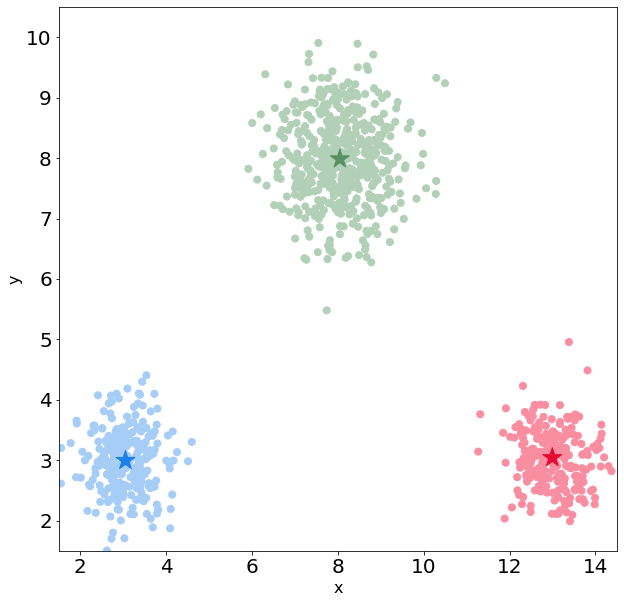

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


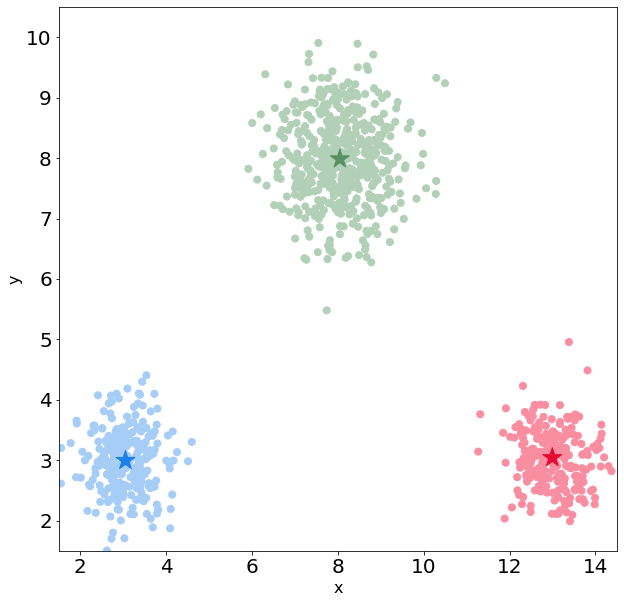

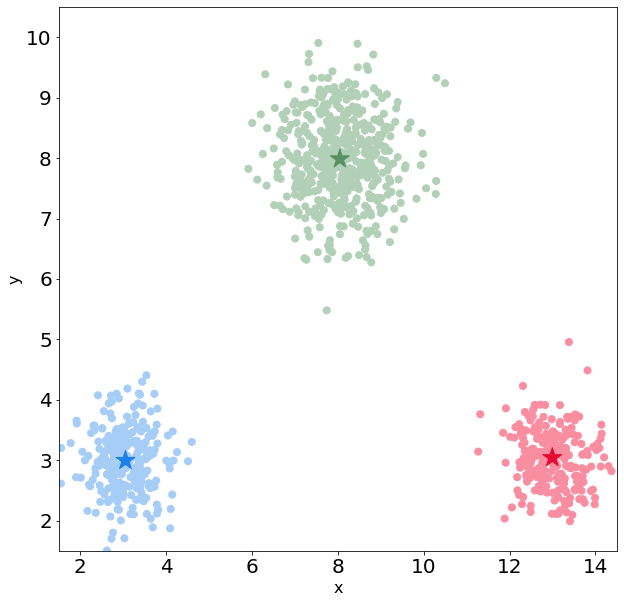

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


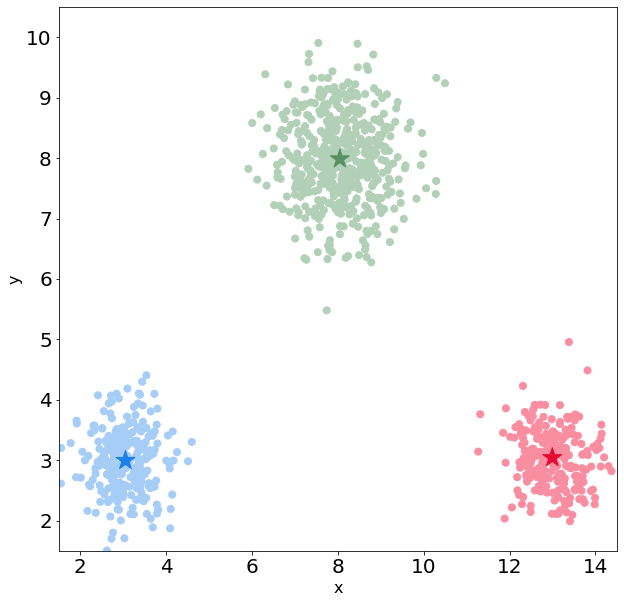

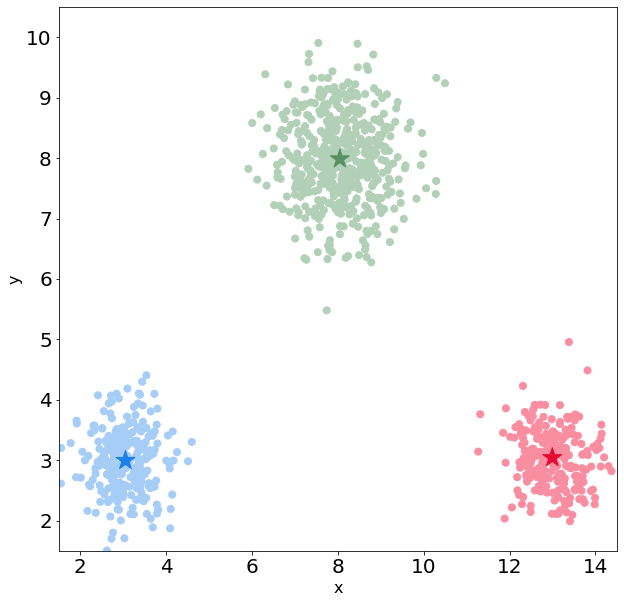

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


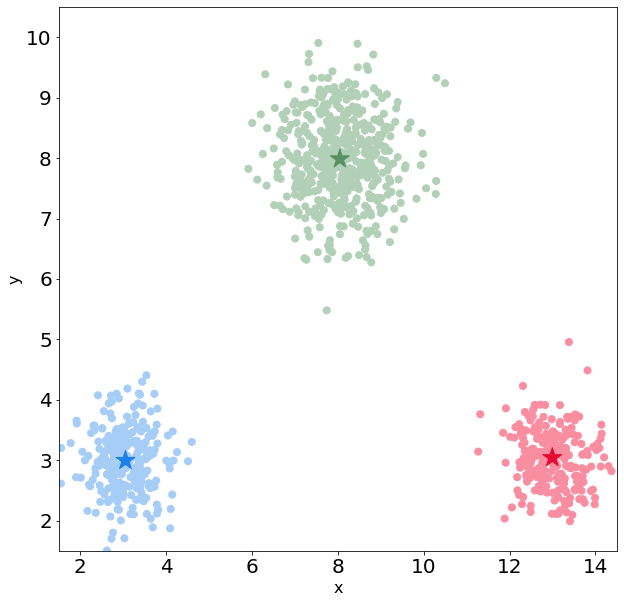

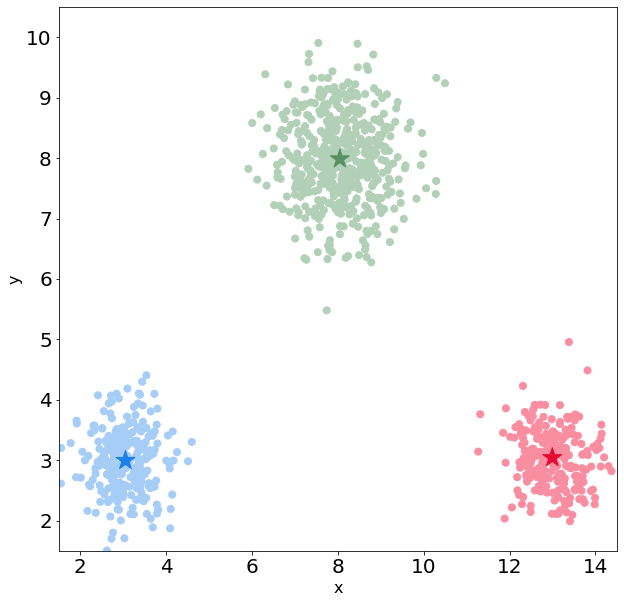

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


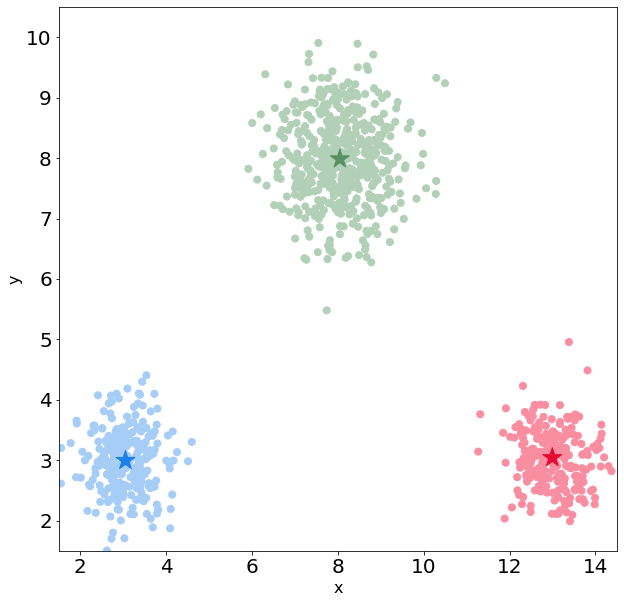

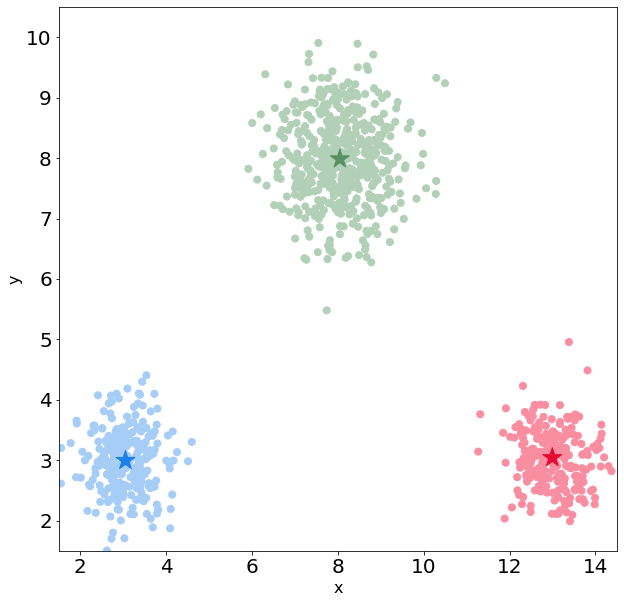

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


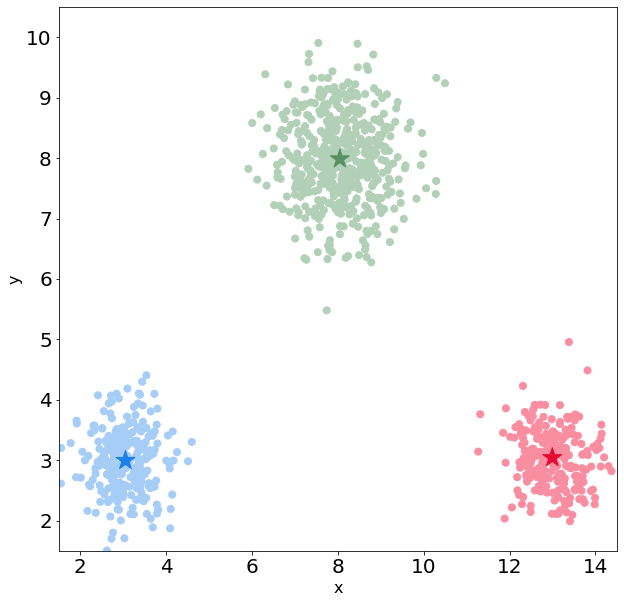

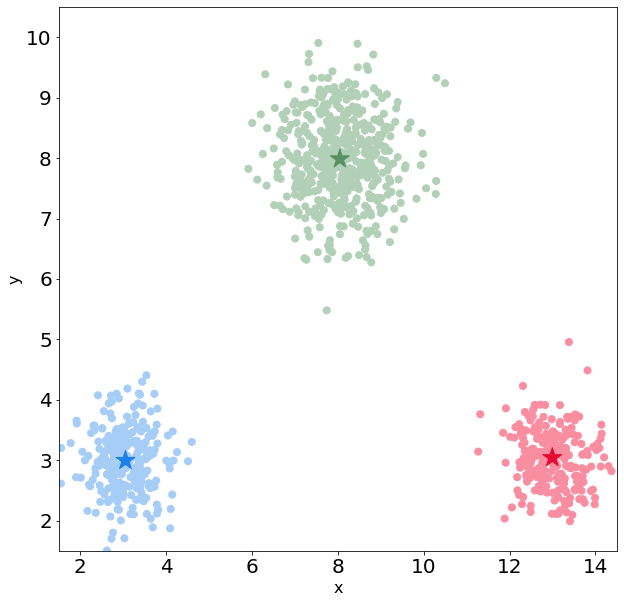

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


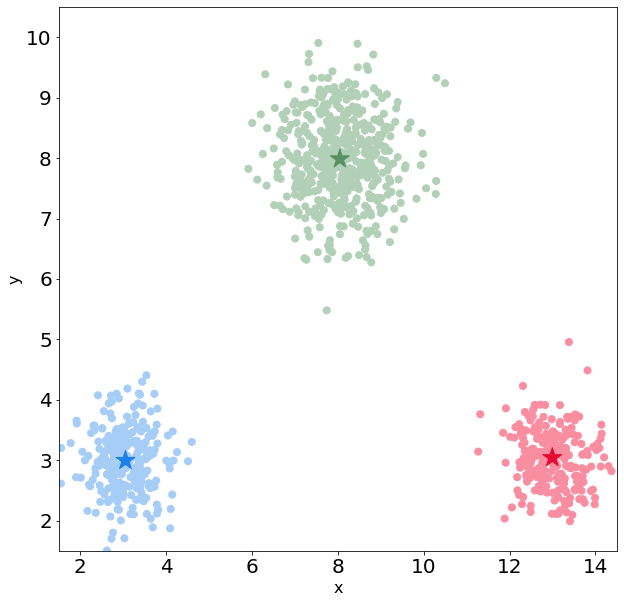

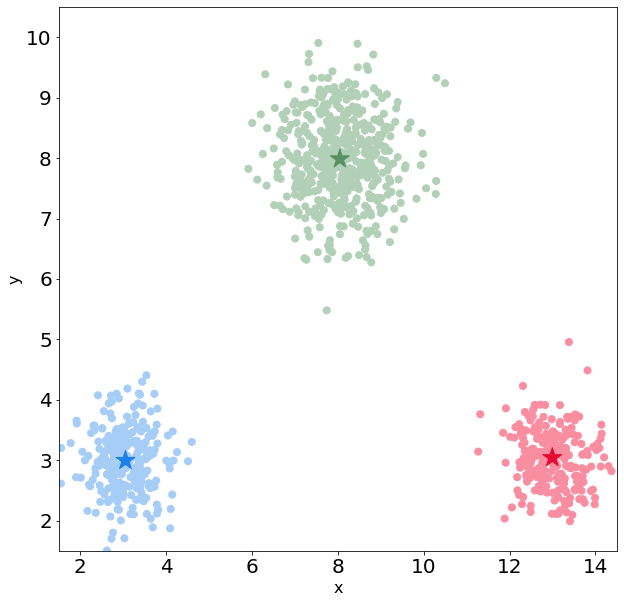

In [10]:
# centroids = np.array([[4,8], [10,2]], np.float64)
np.random.seed(1231231231)
centroids = np.random.normal([8,8], [1,1], (3,2))
# centroids
StepByStepKMeans(dataset4,np.array([[7,7],[8.5,9],[10,7.5]]),10,'example4');

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


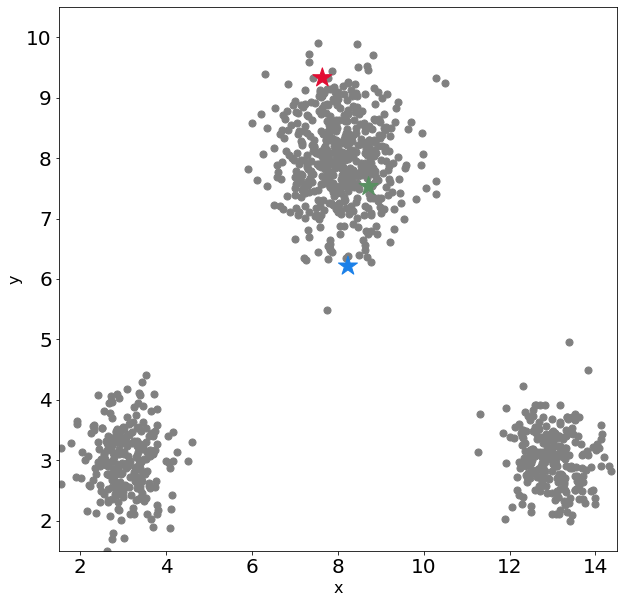

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


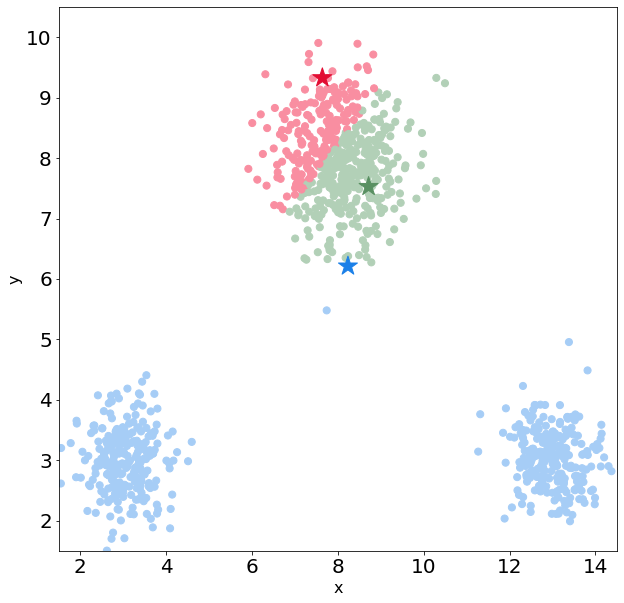

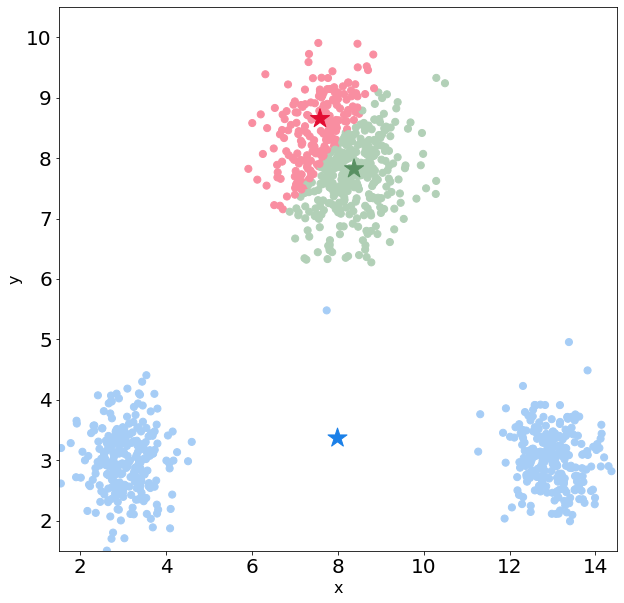

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


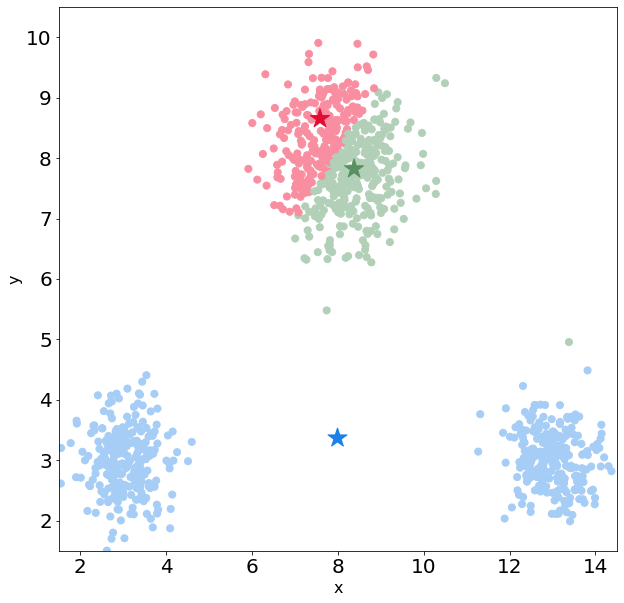

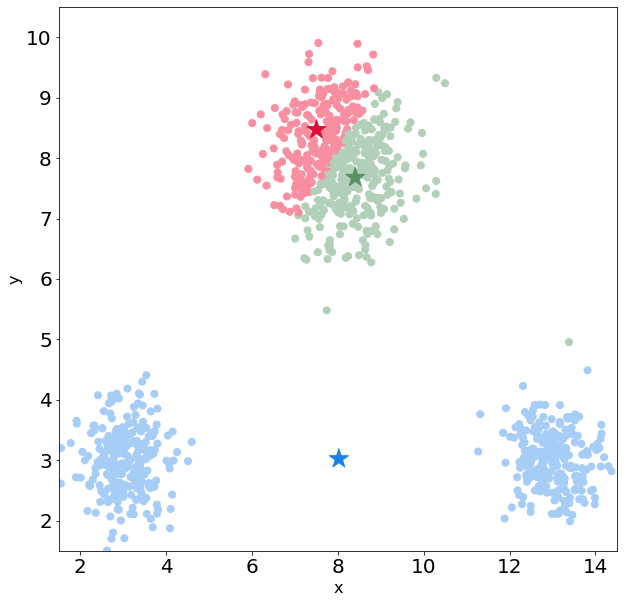

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


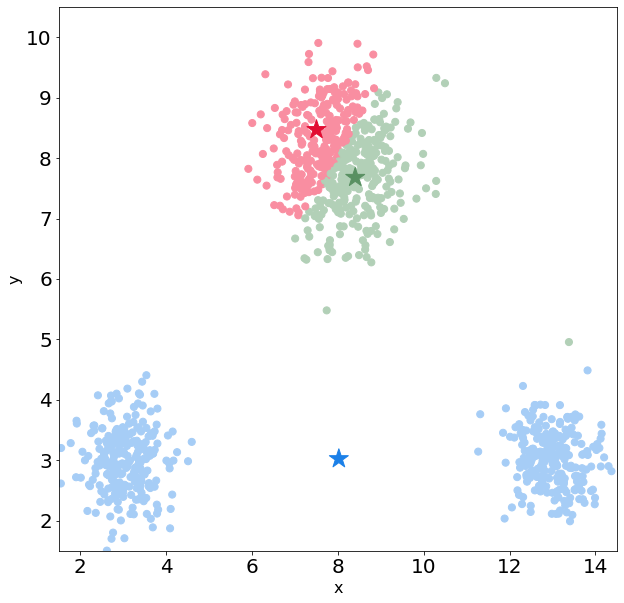

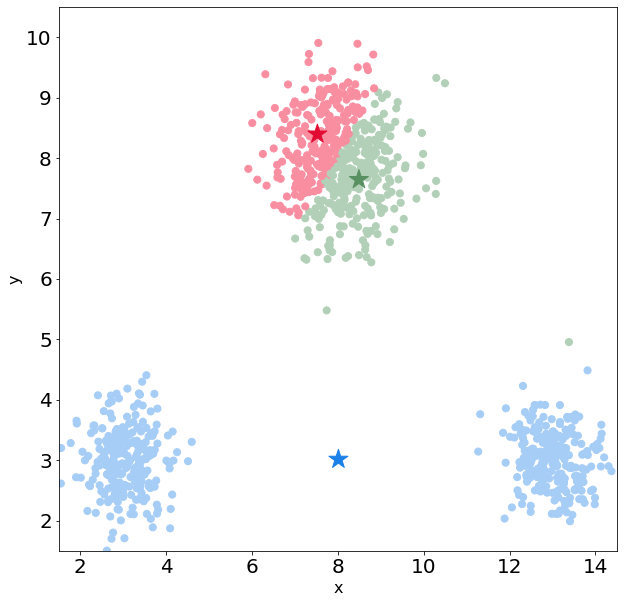

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


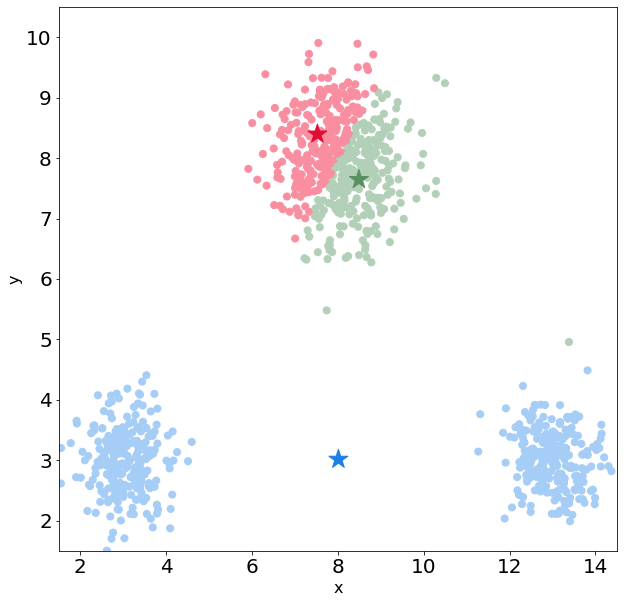

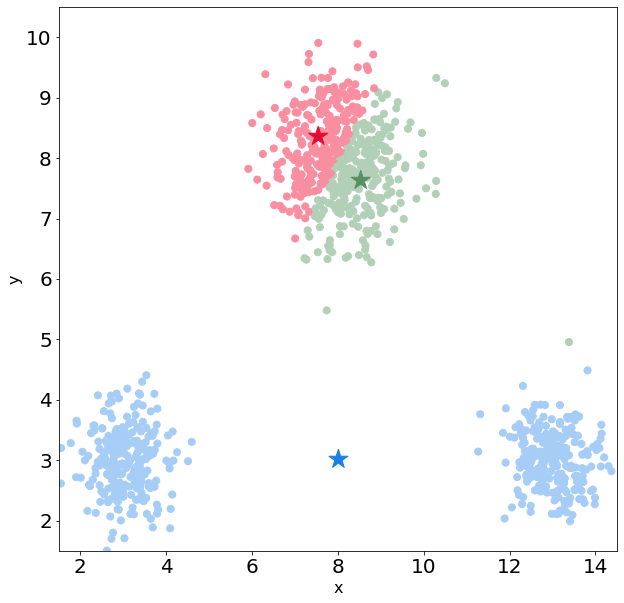

C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  del sys.path[0]
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\talip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


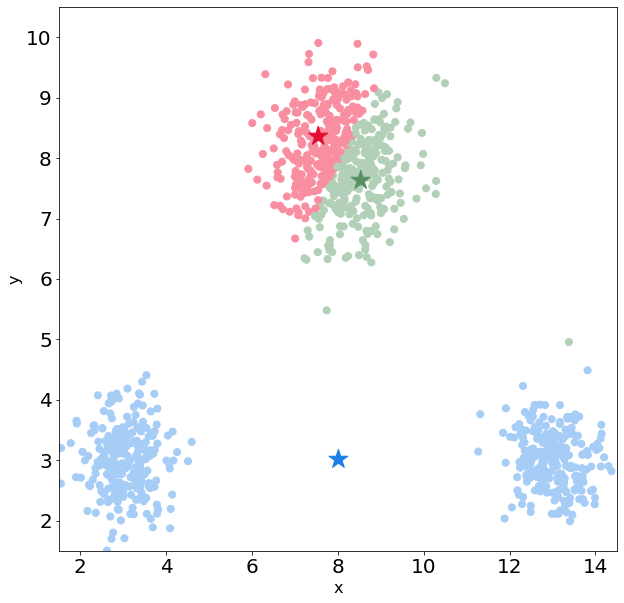

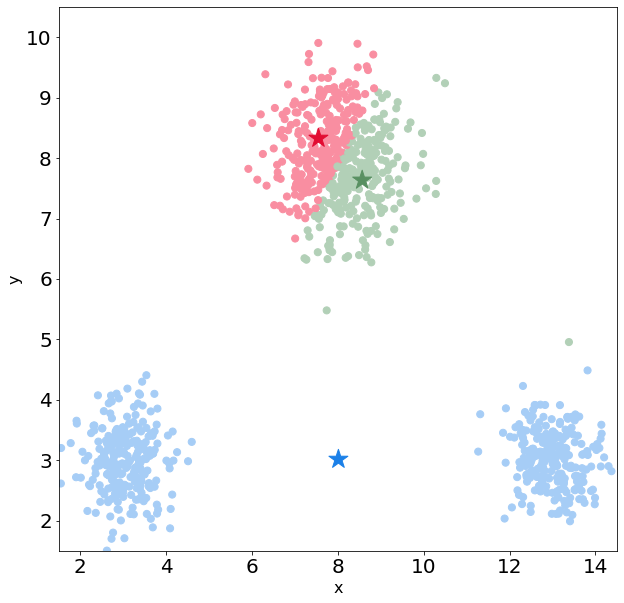

In [11]:
parameters = GetParameters(dataset4)
np.random.seed(1234)
centroids = np.random.normal([8,8], [.5,1.5], (3,2))
StepByStepKMeans(dataset4,centroids,5,'example5');